In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import mpmath as mp

In [2]:
#Extract api#, monthly_oil and date from Drillinginfo File
df = pandas.read_csv('Monthly_Production.CSV')
oil = np.array(df['Monthly Oil'].values)
api_well = np.array(df['API/UWI'].values)
pro_month = np.array(df['Monthly Production Date'].values)
unique_ids=len(np.unique(api_well))
print('Total number of wells are: {}'.format (unique_ids)) # Confirming all 153 wells are read into memory

Total number of wells are: 153


In [3]:
ID_0 = api_well[0]
i=0
j=0
k=0
oil_array=np.zeros((unique_ids,36),dtype=int)
for ID in api_well:
    if ID==ID_0:
        oil_array[i,j]=oil[k]
        j=j+1
    else:
        ID_0=ID
        i=i+1
        j=0
    k=k+1 

In [4]:
def Jacobi_theta(t,logQi,chi,eta):
    Qt = np.zeros(len(t))
    for i in range(len(t)):
        Qt[i] = logQi + np.log10(float(mp.jtheta(2,chi,np.exp(-eta*t[i]))))
    return Qt

In [5]:
def post(logQi,chi,eta,sigma,t,data):
    like = np.prod(np.exp(-np.power(Jacobi_theta(t,logQi,chi,eta)-data, 2)/sigma**2))
    return like # because constant uniform prior

In [6]:
tt_test = np.linspace(1,24,24)
selected_wells=np.array([7,8,9,10,11,12,13,14,16])
#selected_wells=np.linspace(0,149,150,dtype=int)
plot_no=0
grid_sz=np.sqrt(len(selected_wells))
qq_p10=np.zeros([len(selected_wells),24])
qq_p90=np.zeros([len(selected_wells),24])

for well_no in selected_wells:
    cur = oil_array[selected_wells[plot_no]]
    rec_month = np.count_nonzero(cur)
    data = np.log10(cur[0:12])


    t=np.arange(0,12)
 
    logQi = data[0]
    #logQi = 4
    chi = 0.5
    eta = 0.5
    t_fine = np.linspace(0.01,11,119)
    t = np.linspace(1,12,12)
    Niter = 10000
    chain = np.zeros((Niter,3))
    chain[0,0] = logQi# Initialize the chain with first guess
    chain[0,1] = chi
    chain[0,2] = eta
    
    sigma=0.05

    for ii in np.arange(Niter-1):
            if ii%1000 ==0:
                print('iteration {}'.format(ii))
            logQi    = chain[ii,0] 
            chi      = chain[ii,1] 
            eta      = chain[ii,2] 
            chi_p    = float(chi + np.random.normal(loc=0.0,scale=0.1,size=1))
            logQi_p  = float(logQi + np.random.normal(loc=0.0,scale=0.1,size=1))
            eta_p     = float(eta + np.random.normal(loc=0.0,scale=0.1,size=1))

            if chi_p < 0 or eta_p<0 or logQi_p > 7 or logQi_p< -2:
                chain[ii+1,:] = chain[ii,:]
            elif (post(logQi_p,chi_p,eta_p,sigma,t,data) / post(logQi,chi,eta,sigma,t,data)) > np.random.uniform():
                chain[ii+1,0] = logQi_p 
                chain[ii+1,1] = chi_p 
                chain[ii+1,2] = eta_p 
            else:
                chain[ii+1,:] = chain[ii,:]
    print('Sampling finished at iteration {}'.format(Niter)) 

    chain = chain[1000:]#burnin######################update back

    #Testing
    plt.rcParams['figure.figsize'] = (8, 4)
    chains_to_plot=np.arange(1000)*9
    kk=0
    qq=np.zeros([len(chains_to_plot),24])
    
    for ii in chains_to_plot:
        qq[kk,:]=Jacobi_theta(tt_test,chain[ii,0],chain[ii,1],chain[ii,2])
        kk+=1

    for tt in np.arange(0,24):
        sorted_qq=np.sort(qq[:,tt])
        ixL = np.floor(np.size(sorted_qq)*0.1).astype(int) ## lower index
        ixU = np.floor(np.size(sorted_qq)*0.9).astype(int) ## upper index
        qq_p10[plot_no,tt]=sorted_qq[ixL]
        qq_p90[plot_no,tt]=sorted_qq[ixU]
    plot_no=plot_no+1

iteration 0


C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0


C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars


iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000
iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
Sampling finished at iteration 10000


C:\Users\peace\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


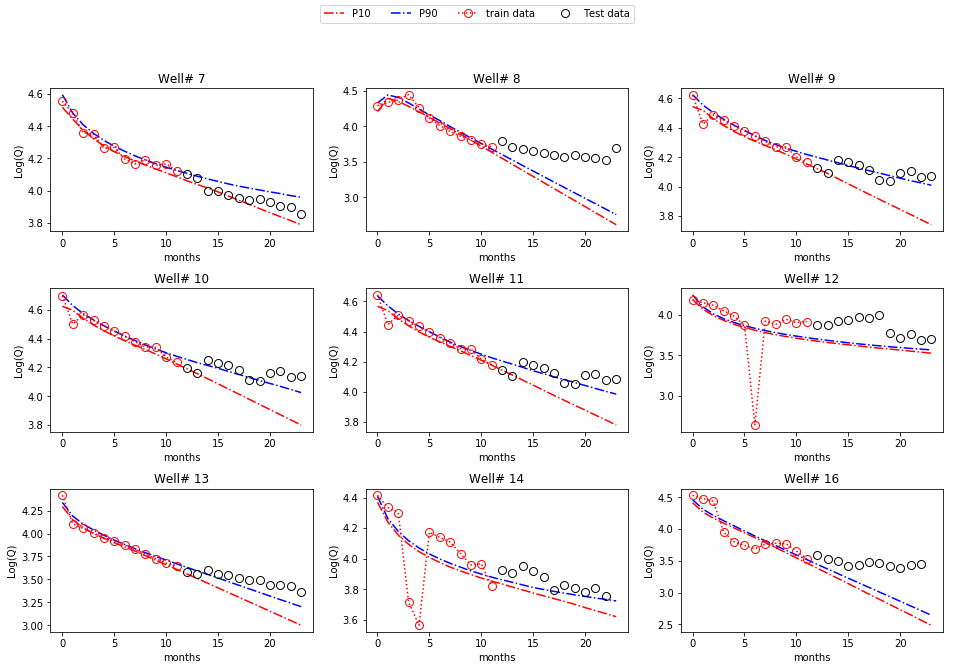

In [7]:
plt.rcParams['figure.figsize'] = (16,10)
marker_style = dict(color='r', linestyle=':', marker='o',
                    markersize=8, markerfacecoloralt='gray')
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=1)

plot_no=0
for well_no in selected_wells:
    cur = oil_array[selected_wells[plot_no]]
    data = np.log10(cur[0:12])
    aa = fig.add_subplot(grid_sz,grid_sz, plot_no+1)
    fig.subplots_adjust(hspace=0.4, wspace=.2)
    aa.plot(qq_p10[plot_no,:],'r-.',label='P10')
    aa.plot(qq_p90[plot_no,:],'b-.',label='P90')
    aa.set(xlabel='months', ylabel='Log(Q)',title='Well# {}'.format(selected_wells[plot_no]));
    aa.plot(data,'ro',fillstyle='none',**marker_style,label='train data')
    aa.plot(np.linspace(12,23,12),np.log10(cur[12:24]),'ko',fillstyle='none',markersize=8,label='Test data' )
    #aa.legend(loc='upper right');
    plot_no=plot_no+1;
handles, labels = aa.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',ncol=4);

In [ ]:
plot_no=0
count=np.zeros([9,12])
#count_int=0
for well_no in selected_wells:
    cur = oil_array[selected_wells[plot_no]]
    data = np.log10(cur[12:24])
    q_p10=qq_p10[plot_no,12:24]
    q_p90=qq_p90[plot_no,12:24]
    
    for jj in np.arange(0,12):
        if data[jj]<q_p90[jj] and data[jj]>q_p10[jj]:
            count[plot_no,jj]=1
    
    plot_no=plot_no+1;
sum(sum(count))/(len(data)*len(selected_wells)) 